# GGR274 Lab 8: Project Proposal and Comparing Two-samples

## Logistics

Like previous weeks, our lab grade will be based on attendance and submission of a few small tasks to MarkUs during the lab session (or by 23:59 on Thursday).

Complete the tasks in this Jupyter notebook and submit your completed file to [MarkUs](https://markus.teach.cs.toronto.edu/markus/main/login_remote_auth).
Here are the instructions for submitting to MarkUs (same as last week):

1. Download this file (`Lab_8.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **lab8** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)


> Aim to check your qualitative answer to Task 5 with the TA during the lab.

## Lab Instructions and Learning Objectives

- Developing part of your project proposal

- Simulating the null hypothesis distribution for comparing two samples

## What Question will you answer in the final project?

Review the [sample final project questions](https://uoftcompdsci.github.io/ggr274-20231/project/presentation/GGR274videopresentation.html#final-project-questions).  

[Chapter 3](https://bookdown.org/rdpeng/artofdatascience/chapter-question.html) in [The Art of Data Science (Peng, R. and Matsui, E. (2017)](https://bookdown.org/rdpeng/artofdatascience/) discusses characteristics of a good Data Science question and translating a question into a data problem.

In this part of the tutorial you are going to look at part of the project proposal backwards.

a) Write a few bullet points describing the conclusions you hope to make or what you hope to learn from the project.

> *Answer goes here...*
>
>

b) What question will the conclusions answer?  Briefly describe the question using a few bullet points. 

> *Answer goes here...*
>
>

## Create a simulation of a null hypothesis


### Gender Bias in Promotion

- 1972 study on "sex role stereotypes on personnel decisions".
- 48 male managers were asked to rate whether several candidates were suitable for promotion.
- Managers were randomly assigned to review the file of either a male or female candidate.  The files were otherwise identical. 


B. Rosen and T.H. Jerdee (1974). Influence of sex role stereotypes on personnel decisions. *Journal of Applied Psychology* **59**(1), 9-14.

## What they found

Observed results | Male | Female | Total
-----------------|------|--------|------
Promoted |21 |14 |35
Not promoted |3 |10 |13  
Total |24 |24 |48


 
 - 21/24 = 87.5% of males were recommended for promotion
 - 14/24 = 58.3% of females were recommended for promotion

## The data

Data are in the DataFrame `bias`.

In [1]:
# DO NOT CHANGE THE CODE
import pandas as pd
import numpy as np

sex = ["M"] * 24 + ["F"] * 24                               # creates as list of 24 "M"s and 24 "F"s
promoted = ["Y"] * 21 + ["N"] * 3 + ["Y"] * 14 + ["N"] * 10 # creates as list of 21 "Y"s and 3 "N"s followed by 14 "Y"s and 10 "N"s

data = {"sex": sex,"promoted": promoted}
bias = pd.DataFrame(data)

bias.head()

np.random.seed(274)

/var/folders/0j/ybsv4ncn5w50v40vdh5jjlww0000gn/T/ipykernel_99666/2240364935.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Task 1

a) The code in the cell below computes the proportion of promoted males `promoted_males` and females `promoted_females`. Complete the code below by filling in the `...`.

In [2]:
# Fill in the ... below

promoted_males = (bias[bias["sex"] == ...]["promoted"] == ...).mean()

promoted_females = (bias[bias["sex"] == ...]["promoted"] == ...).mean()

In [3]:
# Solution
promoted_males = (bias[bias["sex"] == "M"]["promoted"] == "Y").mean()

promoted_females = (bias[bias["sex"] == "F"]["promoted"] == "Y").mean()

b) Use `promoted_males` and `promoted_females` to compute the observed mean difference in promoted Males minus promoted and store the value in `observed_diff`.

In [4]:
observed_diff = promoted_males - promoted_females

observed_diff

0.29166666666666663

## Task 2 - Simulate the null hypothesis

a) Randomly shuffle the column `sex` and assign the shuffled column to `bias_sex_shuffle`.

In [5]:
bias_sex_shuffle = bias["sex"].sample(frac=1).reset_index(drop=True)

b) Use the shuffled labels to compute the mean number of males and females promoted.  Use `promoted_males_shuffled` and `promoted_females_shuffled` to calculate the proportions of males and females promoted when `sex` is randomly shuffled.  Store the result in `prop_males_shuffled` and `prop_females_shuffled`.

In [6]:
promoted_males_shuffled = (bias.loc[bias_sex_shuffle == "M", "promoted"] == "Y")

promoted_females_shuffled = (bias.loc[bias_sex_shuffle == "F", "promoted"] == "Y")

# Fill in the ... below

prop_males_shuffled = ...

prop_females_shuffled = ...

In [7]:
# answer cell

promoted_males_shuffled = (bias.loc[bias_sex_shuffle == "M", "promoted"] == "Y")

promoted_females_shuffled = (bias.loc[bias_sex_shuffle == "F", "promoted"] == "Y")

prop_males_shuffled = promoted_males_shuffled.mean()

prop_females_shuffled = promoted_females_shuffled.mean()


c) Calculate the difference between `prop_males_shuffled` and `prop_females_shuffled`.  Store the value in `diff_sim`.

In [8]:
diff_sim = prop_males_shuffled - prop_females_shuffled

diff_sim

-0.125

## Task 3 - Iterate Task 2 

In this task you will use a `for` loop to iterate Task 2 steps a) - c) 5000 times.  Store the results in a list called `sim_results`. 

_To complete this Task, copy and paste your answers from Task 2 a), b), c) into the following code below and complete the last line._

In [9]:
sim_results = []

for _ in range(5000):
    # paste the code from above here

    # Then, fill in the ... below
    sim_results.append(...)

In [10]:
sim_results = []

for _ in range(5000):
    bias_sex_shuffle = bias["sex"].sample(frac=1).reset_index(drop=True)
    promoted_males_shuffled = (bias.loc[bias_sex_shuffle == "M", "promoted"] == "Y")
    promoted_females_shuffled = (bias.loc[bias_sex_shuffle == "F", "promoted"] == "Y")
    prop_males_shuffled = promoted_males_shuffled.mean()
    prop_females_shuffled = promoted_females_shuffled.mean()
    diff_sim = prop_males_shuffled - prop_females_shuffled
    sim_results.append(diff_sim)

## Task 4 - Plot the null hypothesis distribution 

Use `matplotlib.pyplot` to plot `sim_results`.

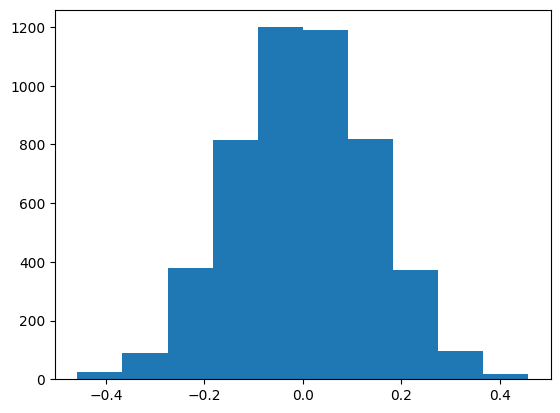

In [11]:
# This import is provided for you (do not change it)
import matplotlib.pyplot as plt

plt.hist(sim_results);

## Task 5 - Evidence

Is there evidence that the difference in males versus females promoted was not due to chance?

_The answer is not graded but aim to share your answer with the TA during the lab._


> 2.76% of the simulations were more extreme than the observed value of the difference assuming that the labels M, F were randomly shuffled. It's unlikely that the difference is due to random chance. This means that this data supports that males were promoted more often than females.

The p-value of the test is below.

In [ ]:
pvalue = (
    (sim_results >= observed_diff).sum() 
    + (sim_results < -1 * observed_diff).sum()
    ) / 5000

pvalue

0.0276